# 1. 문제정의
- 타이타닉호 탑승객의 정보를 통해서 생존자 / 사망자를 예측해보자!
- kaggle에서 좋은 점수를 받기

#  2. 데이터 수집
- kaggle 사이트에서 train, test, gender_submission

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pit
import seaborn as sns # 시각화 라이브러리

In [73]:
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')

In [74]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [75]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [76]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [77]:
# Passenserid  컬럼 삭제
# 1 ~ 891번 까지 순서를 나타내기 위한 데이터이므로 생존 예측에는 영향을 끼치지 않을것으로 생각된다
# del - 열 삭제만 가능
# 키워드
del train['PassengerId']
# drop ~ 행 / 열의 삭제가 가능

In [78]:
# drop ~ 행 / 열의 삭제가 가능
# 함수
test.drop('PassengerId' , axis =1, inplace = True)

In [79]:
train.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [80]:
test.columns

Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Embarked'],
      dtype='object')

#  3. 데이터 전처리

In [46]:
# 정답 컬럼 분리
y_train = train['Survived']
# train에서 Survived 컬럼 삭제
del train['Survived']

In [81]:
print(train.shape)
print(test.shape)

(891, 11)
(418, 10)


In [82]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 32.8+ KB


In [83]:
# 결측치를 채울 컬럼
# 공통 : Age, Cabin
# train : Embarked
# test :Fare

####  train - Embarked 채우기

In [84]:
# value_counts()
# 컬럼 안에 값들의 개수
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [85]:
# 최빈 값으로 결측치 채움
# 결측치를 S로 채움
# fillna
train['Embarked'].fillna('s', inplace = True)

In [86]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


#  test - Fare 채우기

In [87]:
# 중앙값을 통해서 결측치를 채운다
test['Fare'].describe()
# 중앙값 : 14.45

count    417.000000
mean      35.627188
std       55.907576
min        0.000000
25%        7.895800
50%       14.454200
75%       31.500000
max      512.329200
Name: Fare, dtype: float64

In [88]:
test['Fare'].fillna(14.45, inplace = True)

In [89]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      418 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 32.8+ KB


####  Age  채우기
- 다른 컬럼과의 상관관계를 통해서 결측치를 채워보자

In [90]:
# 상관관계
# corr
train.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [91]:
train['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [92]:
age_table = train[['Pclass', 'Sex', 'Age']].groupby(by = ['Pclass', 'Sex']).median()

In [93]:
age_table

Age
Pclass Sex         
1      female  35.0
       male    40.0
2      female  28.0
       male    30.0
3      female  21.5
       male    25.0

In [94]:
age_table.loc[(3, 'female'), 'Age']

21.5

In [95]:
# train.apply(fill_age)로 받을 경우
# person 자리에 train이 들어가게 됨
# 따라서 np.isnan()의 경우 값이 없으면 True를 출력하게 되는데
# apply는 처음부터 한줄씩 채워가기 때문에 if와 같은 조건으로 쓰게 되면
# 자동으로 결측치의 값을 채워주게됨

def fill_age(person) :
    if np.isnan(person['Age']): #결측치면 True 결측치가 아니면 False
        return age_table.loc[person['Pclass'],person['Sex']][0]
    else:
        return person['Age']

In [96]:
np.isnan(train.iloc[5]["Age"])

True

In [97]:
train['Age'] = train.apply(fill_age, axis = 1)
test['Age'] = train.apply(fill_age, axis = 1)

In [98]:
# 변수명.apply(함수명, axis = 1(행단위) / axis = 0(열단위))
train.apply(fill_age, axis = 1)

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    21.5
889    26.0
890    32.0
Length: 891, dtype: float64

####  공통 - Cabin 채우기

In [99]:
# unique : 중복을 제거하고 하나의 값만 출력
train['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [100]:
# 첫번째 글자만 가져와서 저장
train['Cabin'] = train['Cabin'].str[0]
test['Cabin'] = test['Cabin'].str[0]

In [101]:
train['Cabin'].unique()

array([nan, 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [102]:
# 결측치를 'M' 갑으로 채우기
train['Cabin'].fillna('M', inplace = True)
test['Cabin'].fillna('M', inplace = True)

In [103]:
train['Cabin'].unique()

array(['M', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

#  4. 탐색적 데이터 분석
- 특성공학 : 컬럼에 연산을 통해서 의미있는 새로운 정보를 추출하는 행위
- SibSp(형제자매수) + Parch(부모자식수) + 1 = Family_Size

In [104]:
# Family_size 컬럼 만들기
train['Family_Size'] = train['SibSp'] + train['Parch'] + 1
test['Family_Size'] = test['SibSp'] + test['Parch'] + 1

<AxesSubplot:xlabel='Family_Size', ylabel='count'>

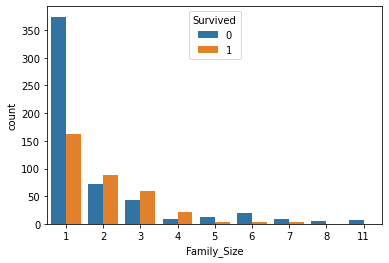

In [105]:
# 그래프를 그려서 연관성을 확인
sns.countplot(data = train, x = 'Family_Size', hue = 'Survived')

- 1명일 때는 죽은 사람의 비율이 높다
- 2 ~ 4 명일 때는 산 사람의 비율이 높다
- 5명 이상일 때는 죽은 사람의 비율이 높다
- 수치형 > 범주형 (Binning)
    - 사소한 관찰 오류를 줄여준다

In [106]:
# bins : 구간
# 0초과 1이하, 1초과 4이하, 4초과 20이하
bins = [0, 1, 4, 20]
# labels 구간별 명칭
labels = ['Alone', 'Small', 'Large']
# cut 함수 : 카테고리(범주형) 데이터를 만듦 bins => 속성 값 / labels => 범주 이름
train_cut = pd.cut(train['Family_Size'], bins = bins, labels = labels)
train['Family_Group'] = train_cut
test_cut = pd.cut(test['Family_Size'], bins = bins, labels = labels)
test['Family_Group'] = test_cut

In [107]:
train.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked', 'Family_Size', 'Family_Group'],
      dtype='object')

<AxesSubplot:xlabel='Family_Group', ylabel='count'>

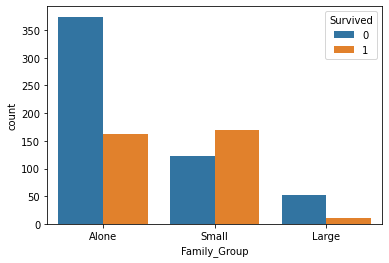

In [108]:
sns.countplot(data = train, x = 'Family_Group', hue = 'Survived')

###  Cabin 컬럼 확인

<AxesSubplot:xlabel='Cabin', ylabel='count'>

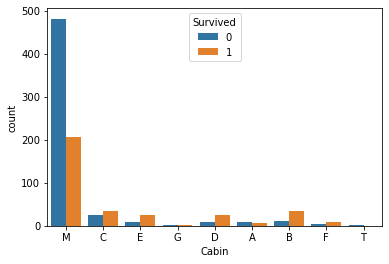

In [109]:
sns.countplot(data = train, x = 'Cabin', hue ='Survived')

###  Pclass 컬럼확인

<AxesSubplot:xlabel='Pclass', ylabel='count'>

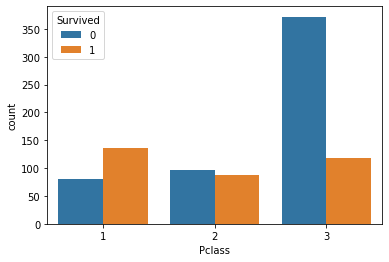

In [110]:
sns.countplot(data = train, x = 'Pclass', hue ='Survived')

###  Cabin과 Pclass 컬럼 확인

<AxesSubplot:xlabel='Cabin', ylabel='count'>

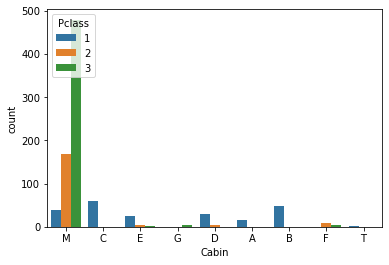

In [111]:
sns.countplot(data = train, x = 'Cabin', hue ='Pclass')

- M 구역에는 3등급 사람들이 많이 탑승을 함, 사망자의 비율이 높음
- A, B, C 구역에는 1등급만 존재

# Embarked 컬럼확인

<AxesSubplot:xlabel='Embarked', ylabel='count'>

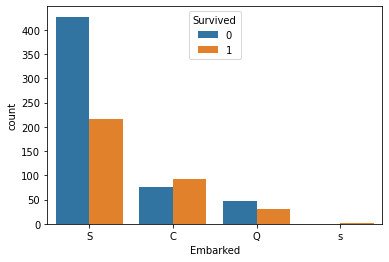

In [112]:
sns.countplot(data = train, x = 'Embarked', hue = 'Survived')

- S에서 탑승한 사람들이 많이 죽었다
- S에서 탄 사람들은 3등급 객실이나 M구역 객실에 있지 않을까?

#### Age 컬럼 확인

<AxesSubplot:xlabel='Sex', ylabel='Age'>

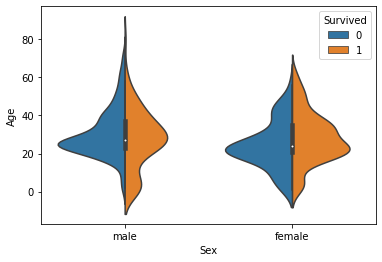

In [113]:
sns.violinplot(data = train, x = 'Sex', y = 'Age', hue = 'Survived', split = True)

- 남자는 산사람과 죽은 사람의 나이대가 차이가 있다
- 여자는 산사람과 죽은 사람의 나이대가 비슷하다
- 어린아이들은 남자가 많이 살았고 여자는 많이 죽었다.

###  Fare 컬럼 확인

<AxesSubplot:xlabel='Sex', ylabel='Fare'>

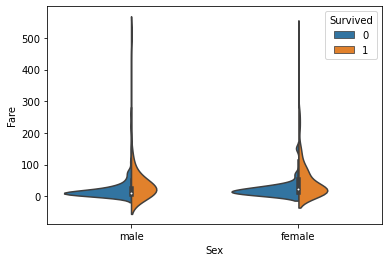

In [114]:
sns.violinplot(data = train, x = 'Sex', y = 'Fare', hue = 'Survived', split = True)

- 요금이 저렴 할 경우 죽은 사람이 더 많음

####  Text 데이터
- name, Ticket
- 비정형 데이터를 특성공학을 통해 정형데이터로 만들어보자

In [115]:
train['Name'] 

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [116]:
# strip : 글자 앞과 뒤의 공백 삭제
def split_title(name):
    return name.split(',')[1].split('.')[0].strip()

In [117]:
train['Title'] = train['Name'].apply(split_title)
test['Title'] = test['Name'].apply(split_title)

In [118]:
# Name 삭제
train.drop('Name', axis = 1, inplace = True)
test.drop('Name', axis = 1, inplace = True)

In [119]:
# 컬럼 안의 속성 값 파악
train['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

In [120]:
# 컬럼 안의 속성 값 개수 파악
train['Title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Major             2
Col               2
Mlle              2
Lady              1
Capt              1
Mme               1
Don               1
Ms                1
the Countess      1
Sir               1
Jonkheer          1
Name: Title, dtype: int64

- 호칭의 범주를 줄여보자
- Mr, Mrs, Miss, Mater, Rev, Other
- map함수를 활용해서 mapping

In [121]:
convert_title_dic = {
    'Mr' : 'Mr' , 
    'Mrs' : 'Mrs', 
    'Miss' : 'Miss', 
    'Master' : 'Master', 
    'Don' : 'Other', 
    'Rev' : 'Rev', 
    'Dr': 'Other', 
    'Mme' : 'Other', 
    'Ms' : 'Other',
    'Major' : 'Other',
    'Lady' : 'Other',
    'Sir' : 'Other',
    'Mlle' : 'Other',
    'Col' : 'Other', 
    'Capt' : 'Other', 
    'the Countess' : 'Other',
    'Jonkheer' : 'Other',
    'Dona' : 'Other'
}

In [122]:
# map함수를 사용하면 알아서 key 값을 변경 시켜줌
train['Title'] = train['Title'].map(convert_title_dic)
test['Title'] = test['Title'].map(convert_title_dic)

In [123]:
train['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Other', 'Rev'], dtype=object)

In [124]:
train['Title'].value_counts()

Mr        517
Miss      182
Mrs       125
Master     40
Other      21
Rev         6
Name: Title, dtype: int64

In [125]:
test['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Other', 'Rev'], dtype=object)

In [126]:
test['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Other       5
Rev         2
Name: Title, dtype: int64

In [127]:
# Ticket
train['Ticket'].value_counts()

CA. 2343        7
1601            7
347082          7
347088          6
3101295         6
               ..
F.C.C. 13531    1
347076          1
315037          1
364851          1
376566          1
Name: Ticket, Length: 681, dtype: int64

In [128]:
train.drop('Ticket', axis = 1, inplace = True)
test.drop('Ticket', axis = 1, inplace = True)

In [129]:
train.shape, test.shape

((891, 12), (418, 11))

#### 글자 데이터를 숫자 데이터로 변경해보자
- 모델은 수치데이터만 학습할 수 있기 때문에 글자 데이터를 수치 데이터로 바꿈
- 문자 컬럼 : Sex, cabin, Embarked, Family_Group, Title

In [130]:
# 원핫인코딩에 대한 컬럼만 추가해 둔 상태
categorical_feature = ['Sex', 'Cabin','Embarked', 'Family_Group', 'Title']

In [131]:
train.shape, test.shape

((891, 12), (418, 11))

In [132]:
y_train = train['Survived']
train.drop('Survived', axis =1, inplace = True)

In [133]:
train.shape, test.shape

((891, 11), (418, 11))

In [134]:
# concat : 행, 열을 기준으로 데이터프레임를 합침
# merge : 데이터를 기준으로 데이터프레임을 합침


# ignore_index => 기존의 인덱스 번호(train<~890> / test<~417>)를 무시하고 
# 데이터 총 인덱스 번호(891+418=1308)를 나타내줌
combine = pd.concat([train,test], ignore_index =True)

In [135]:
# 원핫 인코딩
# get_dummies
one_hot = pd.get_dummies(combine[categorical_feature])

In [136]:
# 기존 글자데이터 지우기
combine.drop(categorical_feature, axis = 1, inplace = True)

In [137]:
# 원핫 인코딩 데이터 합치기
total_combine = pd.concat([combine, one_hot], axis = 1)

In [138]:
total_combine

,Pclass,Age,SibSp,Parch,Fare,Family_Size,Sex_female,Sex_male,Cabin_A,Cabin_B,...,Embarked_s,Family_Group_Alone,Family_Group_Small,Family_Group_Large,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other,Title_Rev
0,3,22.0,1,0,7.2500,2,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0
1,1,38.0,1,0,71.2833,2,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
2,3,26.0,0,0,7.9250,1,1,0,0,0,...,0,1,0,0,0,1,0,0,0,0
3,1,35.0,1,0,53.1000,2,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
4,3,35.0,0,0,8.0500,1,0,1,0,0,...,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,30.0,0,0,8.0500,1,0,1,0,0,...,0,1,0,0,0,0,1,0,0,0
1305,1,44.0,0,0,108.9000,1,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1306,3,21.5,0,0,7.2500,1,0,1,0,0,...,0,1,0,0,0,0,1,0,0,0
1307,3,34.0,0,0,8.0500,1,0,1,0,0,...,0,1,0,0,0,0,1,0,0,0


In [139]:
total_combine.shape

(1309, 30)

# 5. 모델 선택 및 하이퍼파라미터 조정

In [140]:
from sklearn.tree import DecisionTreeClassifier
tree_model = DecisionTreeClassifier(max_depth = 6)

# 6. 학습

In [141]:
X_train = total_combine.iloc[:891]
X_test = total_combine.iloc[891:]
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)

(891, 30)
(418, 30)
(891,)


In [142]:
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6)

In [143]:
from sklearn.tree import export_graphviz
# .dot 파일로 export 해줍니다
export_graphviz(tree_model, out_file='tree.dot', filled=True, impurity=False)

import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin/'

from subprocess import check_call
check_call(['dot','-Tpng','tree.dot','-o','tree.png'])

!pip install graphviz

import graphviz

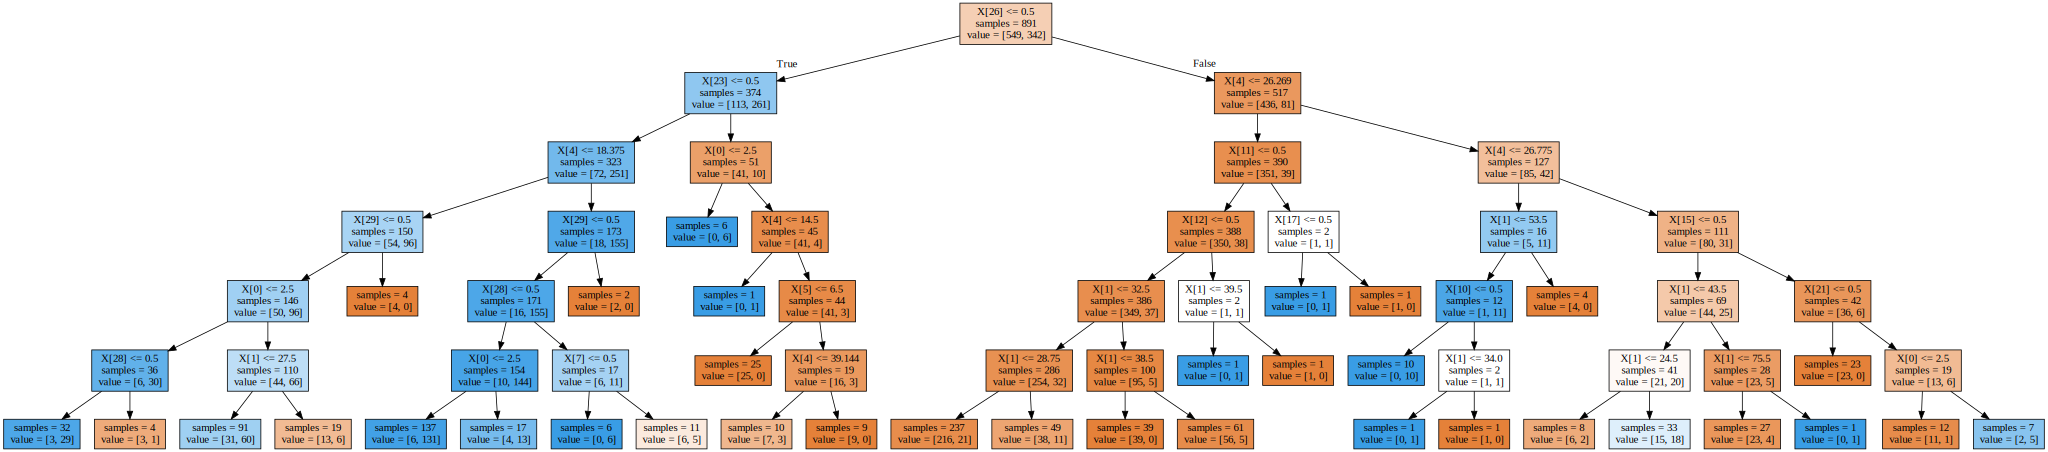

In [144]:
with open("tree.dot") as f :

    dot_graph = f.read()

display(graphviz.Source(dot_graph))

# 7. 평가

In [145]:
pre = tree_model.predict(X_test)

In [187]:
gender = pd.read_csv('./gender_submission.csv')
gender['Survived'] = pre
gender.to_csv('mySubmission01.csv', index = False)

In [147]:
tree_model.score(X_train, y_train)

0.8653198653198653

##  5-1 하이퍼 파라미터 튜닝

In [148]:
from sklearn.model_selection import train_test_split

In [149]:
# 검증 데이터 만들기(validation)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, random_state = 6)

In [150]:
X_train.shape, X_val.shape

((668, 30), (223, 30))

In [151]:
import matplotlib.pyplot as plt

In [152]:
train_score_list = []
val_score_list = []

for md in range(1,50) : # 트리 모델이 단순 -> 복잡
    t_model = DecisionTreeClassifier(max_depth=md)
    t_model.fit(X_train,y_train)
    
    train_score = t_model.score(X_train,y_train)
    val_score = t_model.score(X_val,y_val)
    
    train_score_list.append(train_score)
    val_score_list.append(val_score)

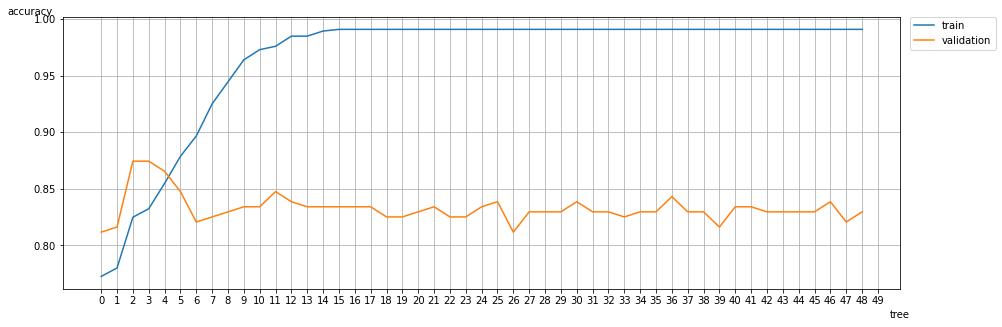

In [153]:
plt.figure(figsize=(15,5)) # 가로,세로
plt.plot(train_score_list,label='train')
plt.plot(val_score_list,label='validation')
plt.xticks(range(0,50))
plt.legend(loc = "upper right", bbox_to_anchor = (1.12,1.02)) # 범례
plt.xlabel('tree', position =(1,0))
plt.ylabel('accuracy', rotation = 0, position = (1,1))
plt.grid()
plt.show()

- max_depth을 6으로 설정하자

# 6-1 학습

In [154]:
X_train = pd.concat([X_train, X_val])

y_train = pd.concat([y_train, y_val])

#  7. 평가

In [155]:
final_tree = DecisionTreeClassifier(max_depth = 6)
final_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6)

In [156]:
final_pre = final_tree.predict(X_test)

In [157]:
gender = pd.read_csv('./gender_submission.csv')
gender['Survived'] = final_pre
gender.to_csv('mySubmission02.csv', index = False)

# 5-2 모델 선택 및 하이퍼 파라미터 조정

In [158]:
# 교차검증
from sklearn.model_selection import cross_val_score
final_tree = DecisionTreeClassifier(max_depth = 6)

# 6-2 학습

# 7-2 평가

In [159]:
# 사용함 모델
# 훈련용 문제(X_train)
# 훈련용 정답(y_train)
# 데이터 분할 수(cv)
cross_val_score(final_tree, X_train, y_train, cv = 2). mean()

0.8036126366705296

In [160]:
for i in range(1,20):
    t_model = DecisionTreeClassifier(max_depth = i)
    t_model.fit(X_train, y_train)
    result = cross_val_score(final_tree, X_train, y_train, cv = 5).mean()
    print('{}번째의 값 : {}'.format(i,result))

1번째의 값 : 0.8147887765990836
2번째의 값 : 0.8136651810934655
3번째의 값 : 0.8136714581633294
4번째의 값 : 0.8148013307388112
5번째의 값 : 0.8159123721047015
6번째의 값 : 0.8159123721047015
7번째의 값 : 0.8147887765990834
8번째의 값 : 0.8181532860460738
9번째의 값 : 0.8136714581633294
10번째의 값 : 0.8159186491745654
11번째의 값 : 0.8170359676103196
12번째의 값 : 0.8147950536689473
13번째의 값 : 0.8147950536689473
14번째의 값 : 0.8159060950348378
15번째의 값 : 0.8125478626577113
16번째의 값 : 0.8136714581633294
17번째의 값 : 0.8170422446801833
18번째의 값 : 0.8159123721047015
19번째의 값 : 0.8147887765990836


In [161]:
for md in range(1,50):
    t_model = DecisionTreeClassifier(max_depth = md)
    t_model.fit(X_train, y_train)
    
    result = cross_val_score(t_model, X_train, y_train, cv = 5)
    print('max_depth :',md,'score :', result.mean())

max_depth : 1 score : 0.7777603414726005
max_depth : 2 score : 0.7710375996484841
max_depth : 3 score : 0.8125855250768941
max_depth : 4 score : 0.8215366267026551
max_depth : 5 score : 0.8170359676103194
max_depth : 6 score : 0.8147887765990836
max_depth : 7 score : 0.7990961019396147
max_depth : 8 score : 0.8035653756826313
max_depth : 9 score : 0.7912058251208336
max_depth : 10 score : 0.781112296779863
max_depth : 11 score : 0.7934718473416609
max_depth : 12 score : 0.7901073378946708
max_depth : 13 score : 0.7822484464252086
max_depth : 14 score : 0.7789027681878099
max_depth : 15 score : 0.7732659594501288
max_depth : 16 score : 0.7833720419308267
max_depth : 17 score : 0.7755257046010922
max_depth : 18 score : 0.7755319816709559
max_depth : 19 score : 0.7889900194589166
max_depth : 20 score : 0.7800138095537004
max_depth : 21 score : 0.7800012554139728
max_depth : 22 score : 0.7833720419308267
max_depth : 23 score : 0.7800075324838366
max_depth : 24 score : 0.7867491055175444
ma

# 5-3 모델 선택 및 하이퍼 파라미터 조정

In [162]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [163]:
rf_model = RandomForestClassifier()
gb_model = GradientBoostingClassifier()

# 6-3 학습

In [164]:
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [165]:
gb_model.fit(X_train, y_train)

GradientBoostingClassifier()

# 7-3 평가

In [166]:
pre = gb_model.predict(X_test)
gender = pd.read_csv('./gender_submission.csv')

gender['Survived'] = pre

gender.to_csv('mySubmission03.csv', index = False)

In [167]:
#RandomForest
cross_val_score(rf_model, X_train,y_train,cv=5).mean()

0.809189630280585

In [168]:
#GradientBoosting
cross_val_score(gb_model, X_train, y_train, cv=5).mean()

0.8226727763480008

# grid search
- max_depth = [1,2,3,4,5]
- min_samples_leaf = [1,2,3,4,5]
- max_leaf_nodes = [1,2,3,4,5]

In [169]:
from sklearn.model_selection import GridSearchCV

In [170]:
param_grid = {
    'max_depth' : [5, 10, 15, 20],
    'n_estimators' : [1000, 1500, 2000, 2500],
    'max_features' : [0.5, 0.7],
    'max_leaf_nodes' : [ 20, 50, 80]
}

In [171]:
grid = GridSearchCV(rf_model, param_grid, cv = 3)

# 5-4 모델 선택 및 하이퍼 파라미터 조정

In [172]:
from sklearn.neighbors import KNeighborsClassifier
Knn_model = KNeighborsClassifier(n_neighbors =3)

In [173]:
result = cross_val_score(Knn_model,
                        X_train,
                        y_train,
                        cv = 5)
print(result)
print(result.mean())

[0.72625698 0.69662921 0.6741573  0.76404494 0.73595506]
0.7194087000188312


In [174]:
# standardScaler
from sklearn.preprocessing import StandardScaler

In [175]:
# 스케일러 학습
# 특성들에 대한 값의 범위를 확인하고 새로운 값이 들어 왔을 때
# 어떤 값으로 바꿔야하는지를 학습
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [176]:
# 값을 바꿔줌
# transform()
trans_X_train = scaler.transform(X_train)
result = cross_val_score(Knn_model,
                        trans_X_train,
                        y_train,
                        cv = 5)

print(result)
print(result.mean())

[0.79888268 0.79775281 0.7752809  0.80337079 0.83707865]
0.8024731655263324


In [177]:
import numpy as np
import pandas as pd
import matplotlib

data = pd.DataFrame([[2,20],[4,40],[8,80],[9,90]],
                   index=['해도','병관','기성','동원'],
                   columns=['시간','성적'])
data

,시간,성적
해도,2,20
병관,4,40
기성,8,80
동원,9,90
